# Imports

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv # only read_csv method is going to be used

# Model Preparation

## Plot data

In [59]:
def plot_data(X, Y, m):
    
    positive_indices = Y>0
#     print('+ indices: \n' + str(positive_indices))
    positive_indices = positive_indices.reshape(m, )
    positive_example_features = X[positive_indices]
#     print('+ features: ' + str(positive_example_features))

    negative_indices = Y == 0
#     print(' - indices:\n' + str(negative_indices))
    negative_indices = negative_indices.reshape(m, )
    negative_example_features = X[negative_indices]
#     print('-ve features:\n' + str(negative_example_features))
    
    plt.scatter(positive_example_features[:, 0], positive_example_features[:, 1], label = 'Positive examples', marker = 'o', color = 'green')
#     print(positive_example_features[:, 0])
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Features from the given dataset')
    plt.scatter(negative_example_features[:, 0], negative_example_features[:, 1], label = 'Negative examples', marker = 'x', color = 'red')
#     print(negative_example_features[:, 0])

    plt.legend(loc = 'right')
    plt.show()
      

## Main function

In [60]:
def main():
    df = read_csv('data1.csv', header = None)
    data = df.values #numpy array
    
    X = data[:,0:2] # extracting features
    Y = data[:,-1] # extracting labels
    
    m = (X.shape)[0] # number of training examples
    
    ones = np.ones(shape = (m,1))
    X_with_bias = np.concatenate([ones, X], axis = 1)
#     print(X_with_bias)

    Y.reshape(m,1)
#     print(Y.shape)

    plot_data(X,Y, m)
    
    
    
    
    

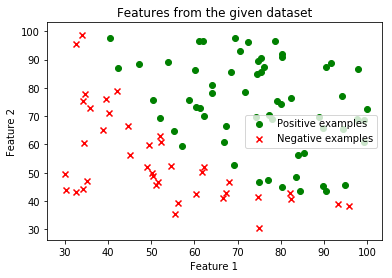

In [61]:
if __name__ == '__main__':
    main()